In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split


In [2]:
df =pd.read_csv("Churn_Modelling.csv")
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [3]:
df.sample(10)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
9377,9378,15709447,Reed,584,France,Female,26,0,146286.22,1,1,0,105105.35,0
7,8,15656148,Obinna,376,Germany,Female,29,4,115046.74,4,1,0,119346.88,1
7067,7068,15761854,Burn,746,France,Female,24,4,0.00,1,0,1,94105.00,0
7340,7341,15578722,Bradley,689,France,Male,39,4,0.00,2,1,0,196112.45,0
2099,2100,15593295,Greathouse,548,France,Male,57,6,76165.65,1,1,1,133537.53,0
5259,5260,15614635,Kepley,582,France,Male,52,2,151457.88,1,0,1,40893.61,0
2416,2417,15707120,Cocci,850,France,Male,46,9,117640.39,1,1,0,88920.68,0
6267,6268,15689328,Harrison,705,Germany,Male,48,9,114169.16,1,0,0,173273.20,1
3884,3885,15735788,Chiagoziem,709,France,Male,31,6,0.00,2,1,1,71009.84,0
4324,4325,15577970,Alexeeva,489,France,Male,34,5,0.00,1,0,0,43540.59,0


In [4]:
df.shape

(10000, 14)

In [5]:
df.dtypes

RowNumber            int64
CustomerId           int64
Surname             object
CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

In [6]:
df.describe(include="all")

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000,10000.000000,10000,10000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
unique,NaN,NaN,2932,NaN,3,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,Smith,NaN,France,Male,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,32,NaN,5014,5457,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,5000.50000,1.569094e+07,NaN,650.528800,NaN,NaN,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,NaN,96.653299,NaN,NaN,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,NaN,350.000000,NaN,NaN,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,NaN,584.000000,NaN,NaN,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,NaN,652.000000,NaN,NaN,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,NaN,718.000000,NaN,NaN,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [8]:
df.drop(["RowNumber","CustomerId","Surname"],axis=1,inplace=True)

C:\Users\Dell\AppData\Local\Temp\ipykernel_232\3170651082.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="Exited",data=df,palette=["maroon","coral"])


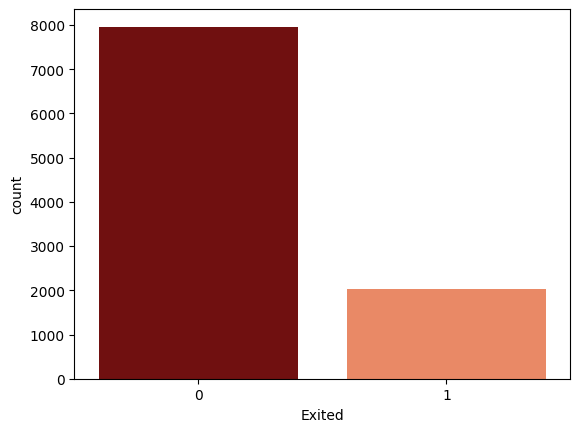

In [16]:
sns.countplot(x="Exited",data=df,palette=["maroon","coral"])
plt.show()

C:\Users\Dell\AppData\Local\Temp\ipykernel_232\2012877352.py:1: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  value_counts = pd.value_counts(df['Exited'])


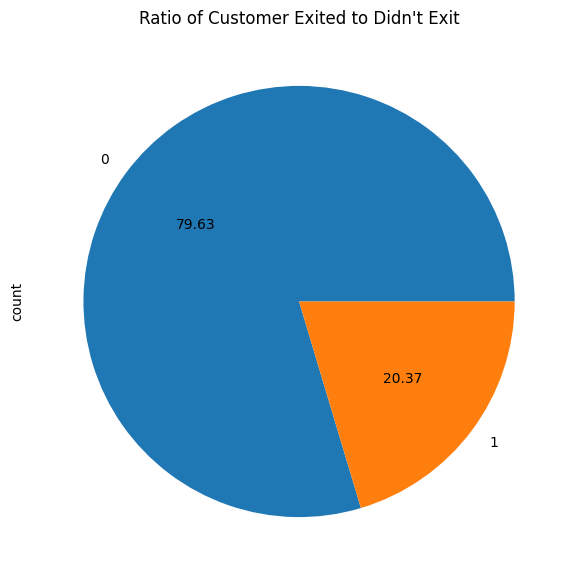

In [20]:
value_counts = pd.value_counts(df['Exited'])
plt.figure(figsize = (8,7))
value_counts.plot(kind = 'pie',autopct='%.2f', shadow=False)
plt.title("Ratio of Customer Exited to Didn't Exit")
plt.show()

In [21]:
df["Exited"].value_counts()

Exited
0    7963
1    2037
Name: count, dtype: int64

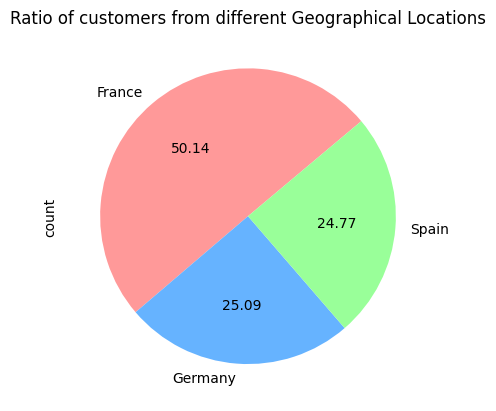

In [28]:
colors = ['#ff9999','#66b3ff','#99ff99','#ffcc99','#c2c2f0','#ffb3e6']
value_counts.plot(kind='pie', autopct='%.2f', colors=colors,startangle = 40)
plt.title('Ratio of customers from different Geographical Locations')
plt.show()

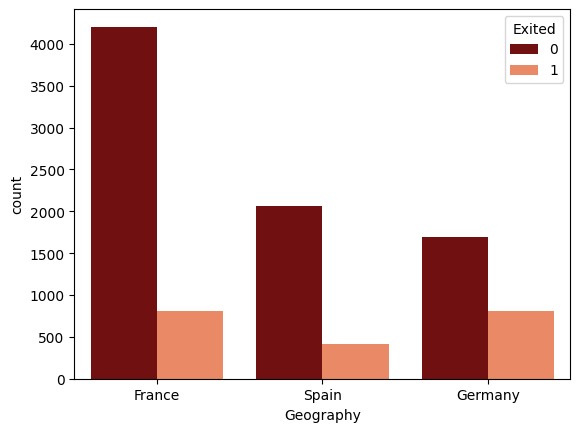

Exited,0,1
Geography,,
France,4204,810
Germany,1695,814
Spain,2064,413


In [30]:
sns.countplot(x="Geography",hue="Exited",palette=["maroon","coral"],data=df)
plt.show()
pd.crosstab(df["Geography"],df["Exited"])

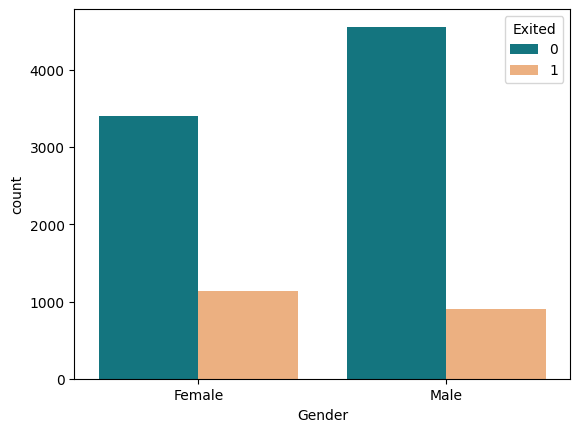

Exited,0,1
Gender,,
Female,3404,1139
Male,4559,898


In [33]:
sns.countplot(x="Gender",hue="Exited",palette=["#028391","#FEAE6F"],data=df)
plt.show()
pd.crosstab(df["Gender"],df["Exited"])

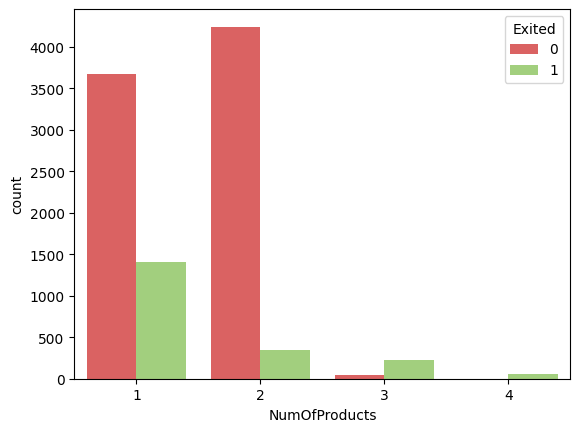

Exited,0,1
NumOfProducts,,
1,3675,1409
2,4242,348
3,46,220
4,0,60


In [35]:
sns.countplot(x="NumOfProducts",hue="Exited",palette=["#EE4E4E","#A1DD70"],data=df)
plt.show()
pd.crosstab(df["NumOfProducts"],df["Exited"])

<Axes: xlabel='Exited', ylabel='Tenure'>

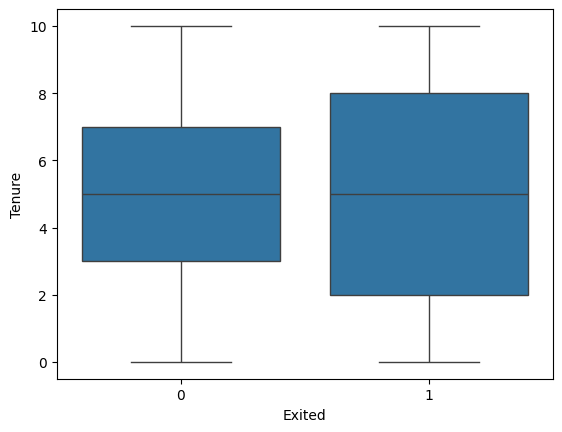

In [36]:
sns.boxplot(x="Exited",y="Tenure",data=df)

C:\Users\Dell\AppData\Local\Temp\ipykernel_232\1177488693.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df["CreditScore"])


<Axes: xlabel='CreditScore', ylabel='Density'>

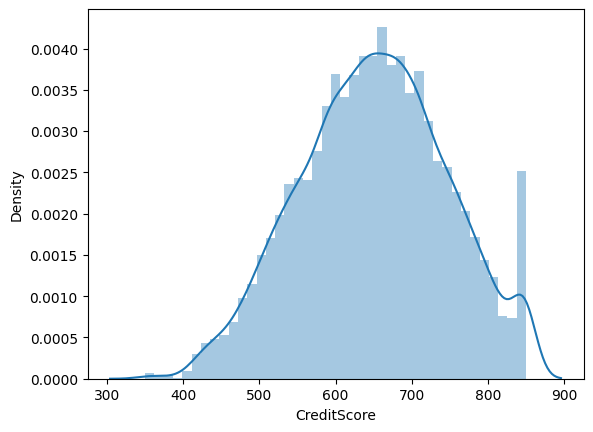

In [37]:
sns.distplot(df["CreditScore"])

C:\Users\Dell\AppData\Local\Temp\ipykernel_232\2732350774.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df["Age"])


<Axes: xlabel='Age', ylabel='Density'>

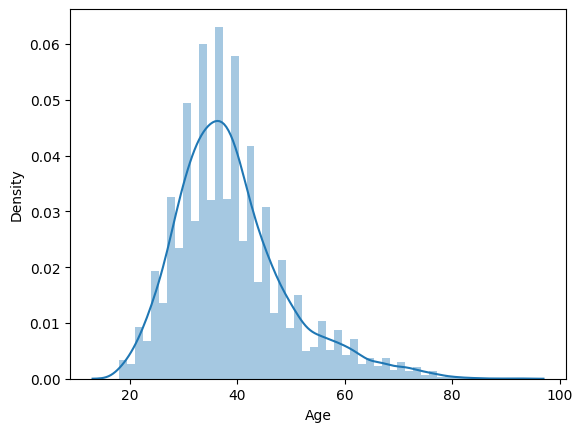

In [38]:
sns.distplot(df["Age"])

<Axes: >

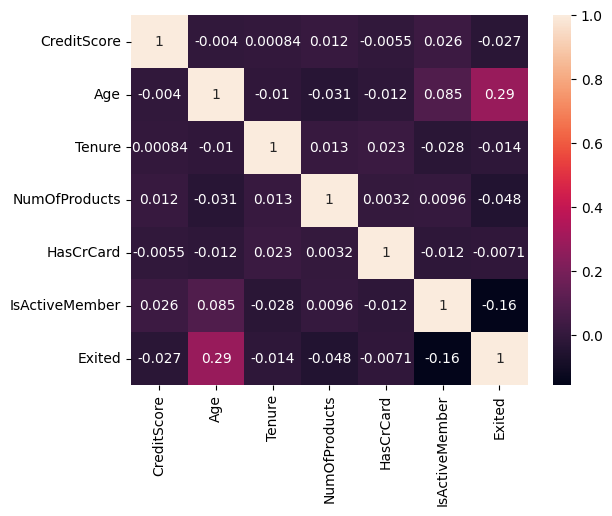

In [39]:
numerical_columns=df.select_dtypes(include=['int64'])
sns.heatmap(data=numerical_columns.corr(),annot=True)

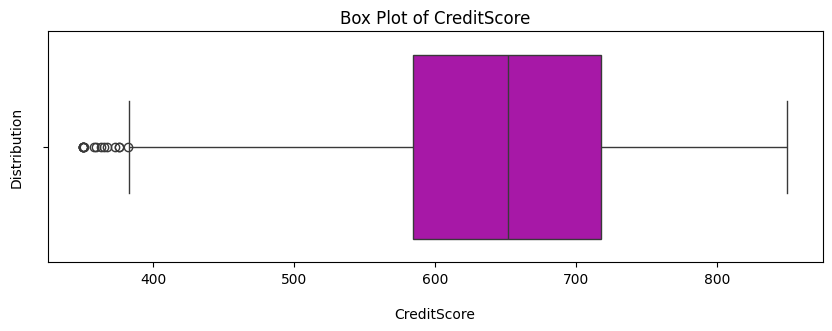

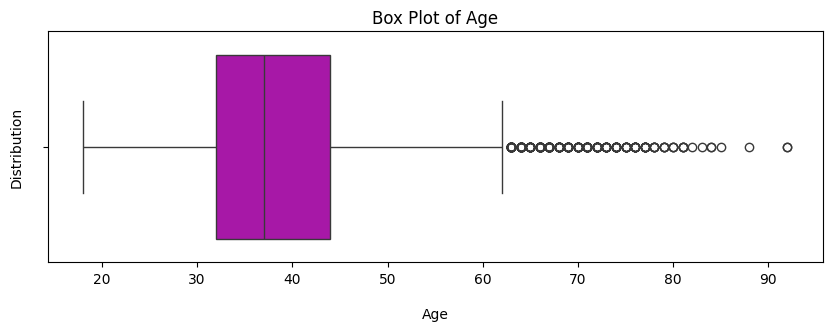

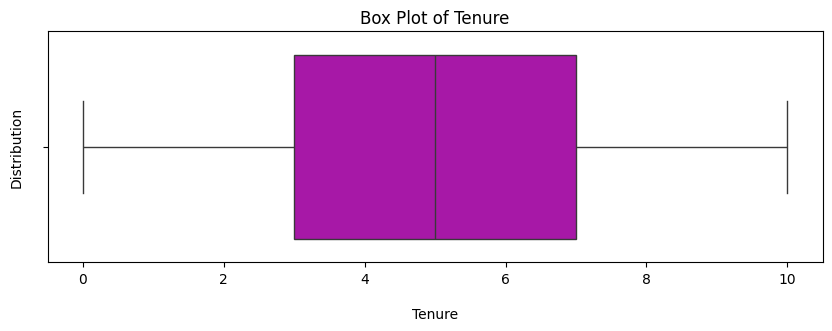

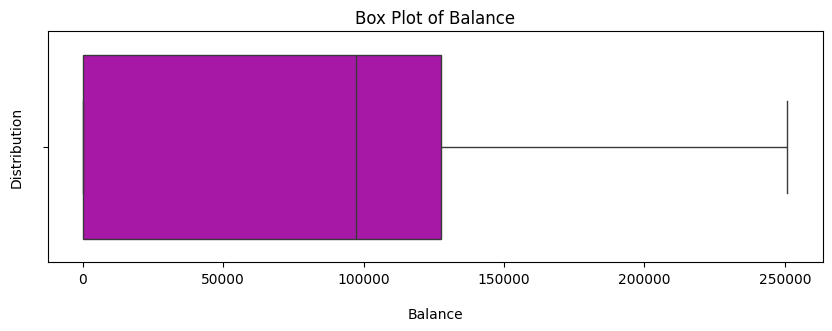

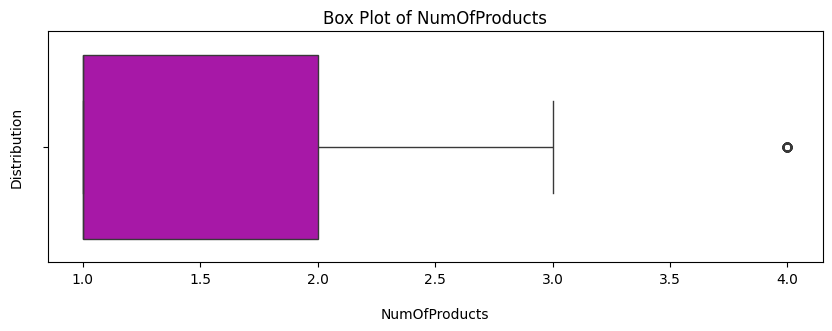

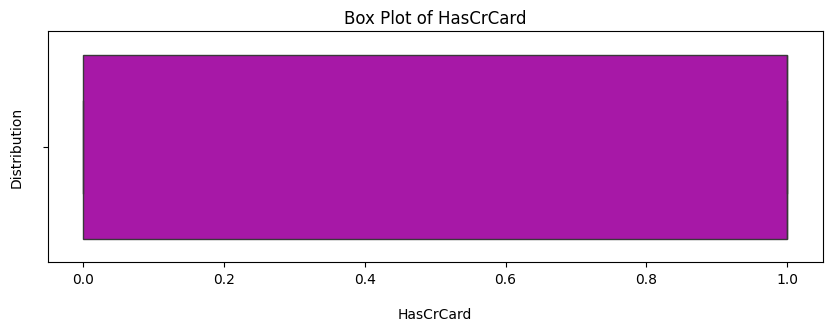

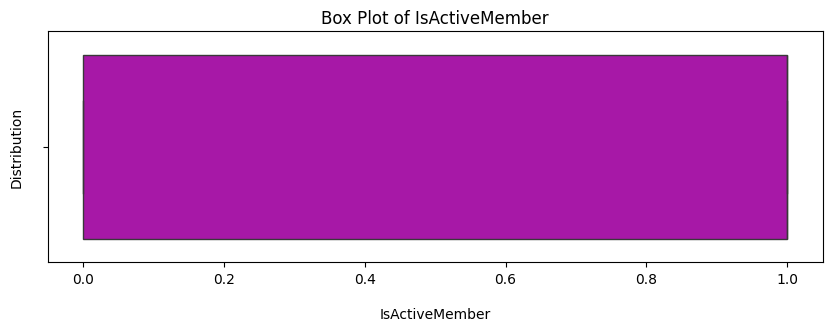

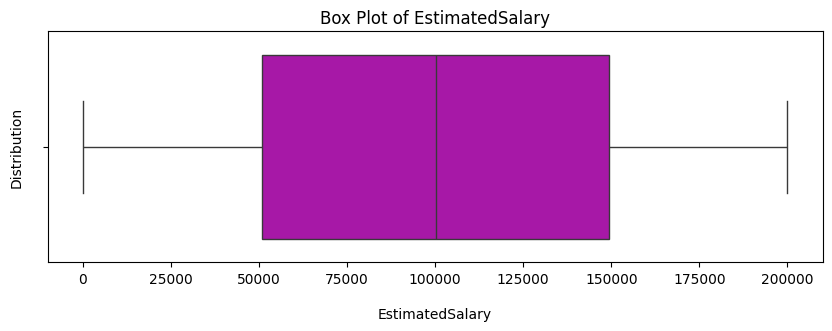

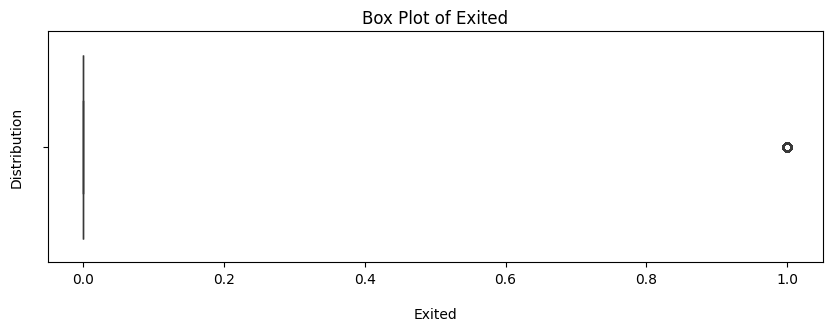

In [40]:
for i in enumerate(df.select_dtypes(exclude=['object']).columns):
    plt.figure(figsize=(10,3))
    
    title_ = "Box Plot of " + str(i[1])
    plt.subplot(1, 1, 1)
    sns.boxplot(x = str(i[1]), data = df, color = 'm')
    plt.title(title_)
    plt.xlabel(str(i[1]), labelpad = 15)
    plt.ylabel("Distribution", labelpad = 10)
    
    plt.show()


In [41]:
df.dtypes


CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

In [42]:
duplicate=df.duplicated()
duplicate.sum()

0

In [43]:
df=pd.get_dummies(columns=["Geography","Gender"],data=df)
df.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,True,False,False,True,False
1,608,41,1,83807.86,1,0,1,112542.58,0,False,False,True,True,False
2,502,42,8,159660.80,3,1,0,113931.57,1,True,False,False,True,False
3,699,39,1,0.00,2,0,0,93826.63,0,True,False,False,True,False
4,850,43,2,125510.82,1,1,1,79084.10,0,False,False,True,True,False


In [44]:
x=df.drop("Exited",axis=1)
x.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,True,False,False,True,False
1,608,41,1,83807.86,1,0,1,112542.58,False,False,True,True,False
2,502,42,8,159660.80,3,1,0,113931.57,True,False,False,True,False
3,699,39,1,0.00,2,0,0,93826.63,True,False,False,True,False
4,850,43,2,125510.82,1,1,1,79084.10,False,False,True,True,False


In [45]:
y=df["Exited"]

In [46]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=1)

In [47]:
model_1=LogisticRegression()
model_1.fit(x_train,y_train)

c:\Users\Dell\Documents\Code\Projects\CustomerChurn\cusCh\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [48]:
model_1.score(x_train,y_train)

0.7935714285714286

In [49]:
model_1.score(x_test,y_test)

0.7896666666666666

In [50]:
from sklearn.tree import DecisionTreeClassifier
model_2=DecisionTreeClassifier(max_depth=8)
model_2.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=8)

In [51]:
model_2.score(x_train,y_train)

0.8855714285714286

In [52]:
model_2.score(x_test,y_test)

0.854

In [53]:
from sklearn.ensemble import BaggingClassifier
model_3=BaggingClassifier(n_estimators=100,max_samples=23)

In [57]:
model_3.fit(x_train,y_train)

BaggingClassifier(max_samples=23, n_estimators=100)

In [58]:
model_3.score(x_train,y_train)

0.8132857142857143

In [59]:
model_3.score(x_test,y_test)

0.807

In [60]:
from sklearn.ensemble import AdaBoostClassifier
model_4=AdaBoostClassifier(n_estimators=70,learning_rate=0.2)
model_4.fit(x_train,y_train)


c:\Users\Dell\Documents\Code\Projects\CustomerChurn\cusCh\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


AdaBoostClassifier(learning_rate=0.2, n_estimators=70)

In [61]:
model_4.score(x_train,y_train)

0.8607142857142858

In [62]:
model_4.score(x_test,y_test)

0.8566666666666667

In [63]:
from sklearn.naive_bayes import GaussianNB
model_7=GaussianNB()
model_7.fit(x_train,y_train)

GaussianNB()

In [64]:
model_7.score(x_train,y_train)

0.7878571428571428

In [65]:
model_7.score(x_test,y_test)

0.784

In [66]:
from sklearn.neighbors import KNeighborsClassifier
model_8=KNeighborsClassifier(n_neighbors=7)
model_8.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=7)

In [67]:
model_8.score(x_train,y_train)

0.8111428571428572

In [ ]:
model_8.score(x_test,y_test)